<a href="https://colab.research.google.com/github/SarahSouzaPontes/analise_dados_dengue/blob/main/Dengue_Explorando_Vari%C3%A1veis__%26_Categorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

'''
Instalação das bibliotecas importantes
'''
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib seaborn

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:

# Carregue o arquivo CSV em um DataFrame, especificando o separador como ';'
df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


# Renomear a categoria "Masculino" para "M" e "Feminino" para "F" na coluna CS_SEXO
df['CS_SEXO'].replace({'M': 'Masculino', 'F': 'Feminino'}, inplace=True)

# Verificar o resultado
print(f"Categorias únicas na coluna CS_SEXO: {df['CS_SEXO'].unique()}")

<ipython-input-51-bd123104b3f9>:2: DtypeWarning:

Columns (27,49,51,88,104) have mixed types. Specify dtype option on import or set low_memory=False.



Categorias únicas na coluna CS_SEXO: ['Masculino' 'Feminino']


In [ ]:
# Verificar o resultado
print(df['CS_SEXO'].unique())

['Masculino' 'Feminino']


In [ ]:
# Supondo que você tenha um DataFrame chamado df

# Renomear as categorias na coluna CS_RACA
df['CS_RACA'].replace({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    6: 'Ignorado'
}, inplace=True)

# Verificar o resultado
print(f"Categorias únicas na coluna CS_RACA: {df['CS_RACA'].unique()}")


Categorias únicas na coluna CS_RACA: ['Parda' 'Preta' 'Branca' 9.0 'Indígena' 'Amarela']


In [ ]:
import pandas as pd

# Supondo que você tenha um DataFrame chamado df

# Lista das colunas a serem renomeadas
colunas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
           'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
           'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
           'ACIDO_PEPT', 'AUTO_IMUNE']

# Renomear as categorias onde tem NaN para 'Sem Registro'
for coluna in colunas:
    df[coluna].fillna(0, inplace=True)
    df[coluna].replace({1: 'Sim', 2: 'Não'}, inplace=True)
    df[coluna].replace({0: 'Sem Registro'}, inplace=True)

# Verificar o resultado
for coluna in colunas:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")


Categorias únicas na coluna FEBRE: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna MIALGIA: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna CEFALEIA: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna EXANTEMA: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna VOMITO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna NAUSEA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna DOR_COSTAS: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna CONJUNTVIT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ARTRITE: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ARTRALGIA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna PETEQUIA_N: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna LEUCOPENIA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna LACO: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna DOR_RETRO: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna DIABETES: ['Sem Registro' 'Não' 'Sim'

In [ ]:
import pandas as pd

# Supondo que você tenha um DataFrame chamado df

# Dicionário de mapeamento para renomear as categorias
mapeamento = {
    'RES_CHIKS1': {4: 'Chikungunya', 2: 'Negativo', 1: 'Positivo', pd.NA: 'Sem Registro'},
    'RES_CHIKS2': {4: 'Chikungunya', 2: 'Negativo', pd.NA: 'Sem Registro'},
    'RESUL_PRNT': {4: 'Sem Registro', 2: 'Negativo'},
    'RESUL_SORO': {4: 'Sem Registro', 1: 'Positivo', 3: 'Inconclusivo', 2: 'Negativo'},
    'RESUL_NS1': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'RESUL_VI_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'SOROTIPO': {pd.NA: 'Sem Registro', 4: 'DEN 4', 3: 'DEN 3', 2: 'DEN 2', 1: 'DEN 1'},
    'HISTOPA_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'IMUNOH_N': {pd.NA: 'Sem Registro', 4: 'Sem Registro', 3: 'Sem Registro', 2: 'Negativo', 1: 'Positivo'},
    'HOSPITALIZ': {1: 'Hospitalizado', 2: 'Não hospitalizado', 9: 'Ignorado'},
    'TPAUTOCTO': {2: 'Autóctone', pd.NA: 'Sem Registro', 1: 'Sem Registro', 3: 'Sem Registro'},
    'COUFINF': {29: '29', pd.NA: 'Sem Registro', 31: '31', 35: '35', 53: '53', 17: '17', 52: '52', 26: '26'},
    'COPAINF': {1: '1', pd.NA: 'Sem Registro'},
    'CLASSIFIN': {8: 'Descartado', 1: '1', 5: '5', pd.NA: 'Sem Registro', 2: '2', 3: '3', 10: '10', 11: '11', 12: '12', 13: '13'},
    'CRITERIO': {pd.NA: 'Sem Registro', 3: 'Em investigação', 2: 'Clínico', 1: 'Laboratório'},
    'DOENCA_TRA': {2: 'Sim', pd.NA: 'Sem Registro', 9: 'Ignorado', 1: 'Não'},
    'CLINC_CHIK': {pd.NA: 'Sem Registro', 1: 'Aguda', 2: 'Crônica'},
    'EVOLUCAO': {pd.NA: 'Sem Registro', 1: 'cura', 9: 'ignorado', 3: 'óbito por outras causas', 4: 'óbito em investigação', 2: 'óbito pelo agravo'}
}

# Renomear as categorias
df.replace(mapeamento, inplace=True)




In [ ]:
import numpy as np

# Supondo que você tenha um DataFrame chamado df

# Selecionar as colunas que começam com 'ALRM'
colunas_alrm = [coluna for coluna in df.columns if coluna.startswith('ALRM')]

# Mapeamento para as colunas ALRM
mapeamento_alrm = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

# Renomear as categorias para as colunas ALRM
for coluna in colunas_alrm:
    df[coluna] = df[coluna].replace(mapeamento_alrm)

# Verificar o resultado
for coluna in colunas_alrm:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")


Categorias únicas na coluna ALRM_HIPOT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_PLAQ: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_VOM: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_SANG: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_ABDOM: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_LETAR: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_HEPAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_LIQ: ['Sem Registro' 'Não' 'Sim']


In [ ]:
import numpy as np

# Supondo que você tenha um DataFrame chamado df

# Selecionar as colunas que começam com 'GRAV'
colunas_grav = [coluna for coluna in df.columns if coluna.startswith('GRAV')]

# Mapeamento para as colunas GRAV
mapeamento_grav = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

# Renomear as categorias para as colunas GRAV
for coluna in colunas_grav:
    df[coluna] = df[coluna].replace(mapeamento_grav)

# Verificar o resultado
for coluna in colunas_grav:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")


Categorias únicas na coluna GRAV_PULSO: ['Sem Registro' 'Não']
Categorias únicas na coluna GRAV_CONV: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_ENCH: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_INSUF: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_TAQUI: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_EXTRE: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_HIPOT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_MELEN: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_METRO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_SANG: ['Sem Registro' 'Não']
Categorias únicas na coluna GRAV_AST: ['Sem Registro' 'Não']
Categorias únicas na coluna GRAV_MIOC: ['Sem Registro' 'Não']
Categorias únicas na coluna GRAV_CONSC: ['Sem Registro' 'Não']
Categorias únicas na coluna GRAV_ORGAO: ['Sem Registro' 'Não' 'Sim']


In [ ]:
import numpy as np

# Mapeamento para cada coluna
mapeamento_mani_hemor = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_epistaxe = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_gengivo = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_metro = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_petequias = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

# Continue com o mapeamento para as demais colunas

# Aplicar o mapeamento para cada coluna
df['MANI_HEMOR'] = df['MANI_HEMOR'].replace(mapeamento_mani_hemor)
df['EPISTAXE'] = df['EPISTAXE'].replace(mapeamento_epistaxe)
df['GENGIVO'] = df['GENGIVO'].replace(mapeamento_gengivo)
df['METRO'] = df['METRO'].replace(mapeamento_metro)
df['PETEQUIAS'] = df['PETEQUIAS'].replace(mapeamento_petequias)
# Continue com as demais colunas

# Verificar o resultado
print("Categorias únicas na coluna MANI_HEMOR:", df['MANI_HEMOR'].unique())
print("Categorias únicas na coluna EPISTAXE:", df['EPISTAXE'].unique())
print("Categorias únicas na coluna GENGIVO:", df['GENGIVO'].unique())
print("Categorias únicas na coluna METRO:", df['METRO'].unique())

mapeamento_hematuria = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_sangram = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_laco_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_plasmatico = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_evidencia = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_con_fhd = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_complica = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_tp_sistema = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_nduplic_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_cs_flxret = {
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    5: 'Sem Registro'
}

mapeamento_flxrecebi = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

# Aplicar o mapeamento para cada coluna
df['HEMATURA'] = df['HEMATURA'].replace(mapeamento_hematuria)
df['SANGRAM'] = df['SANGRAM'].replace(mapeamento_sangram)
df['LACO_N'] = df['LACO_N'].replace(mapeamento_laco_n)
df['PLASMATICO'] = df['PLASMATICO'].replace(mapeamento_plasmatico)
df['EVIDENCIA'] = df['EVIDENCIA'].replace(mapeamento_evidencia)
df['CON_FHD'] = df['CON_FHD'].replace(mapeamento_con_fhd)
df['COMPLICA'] = df['COMPLICA'].replace(mapeamento_complica)
df['TP_SISTEMA'] = df['TP_SISTEMA'].replace(mapeamento_tp_sistema)
df['NDUPLIC_N'] = df['NDUPLIC_N'].replace(mapeamento_nduplic_n)
df['CS_FLXRET'] = df['CS_FLXRET'].replace(mapeamento_cs_flxret)
df['FLXRECEBI'] = df['FLXRECEBI'].replace(mapeamento_flxrecebi)

# Verificar o resultado
print("Categorias únicas na coluna HEMATURA:", df['HEMATURA'].unique())
print("Categorias únicas na coluna SANGRAM:", df['SANGRAM'].unique())
print("Categorias únicas na coluna LACO_N:", df['LACO_N'].unique())
print("Categorias únicas na coluna PLASMATICO:", df['PLASMATICO'].unique())
print("Categorias únicas na coluna EVIDENCIA:", df['EVIDENCIA'].unique())
print("Categorias únicas na coluna CON_FHD:", df['CON_FHD'].unique())
print("Categorias únicas na coluna COMPLICA:", df['COMPLICA'].unique())
print("Categorias únicas na coluna TP_SISTEMA:", df['TP_SISTEMA'].unique())
print("Categorias únicas na coluna NDUPLIC_N:", df['NDUPLIC_N'].unique())
print("Categorias únicas na coluna CS_FLXRET:", df['CS_FLXRET'].unique())
print("Categorias únicas na coluna FLXRECEBI:", df['FLXRECEBI'].unique())


Categorias únicas na coluna MANI_HEMOR: ['Sem Registro' 'Não' 'Não Realizado' 'Sim']
Categorias únicas na coluna EPISTAXE: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GENGIVO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna METRO: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna HEMATURA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna SANGRAM: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna LACO_N: ['Sem Registro' 'Não' 'Sim' 'Não Realizado']
Categorias únicas na coluna PLASMATICO: ['Sem Registro' 'Sim' 'Não Realizado' 'Não']
Categorias únicas na coluna EVIDENCIA: ['Sem Registro' 'Não' 'Sim' 'Indeterminado']
Categorias únicas na coluna CON_FHD: ['Sem Registro' 'Não']
Categorias únicas na coluna COMPLICA: ['Sem Registro' 6.0 4.0 8.0 5.0]
Categorias únicas na coluna TP_SISTEMA: ['Não' 'Sem Registro']
Categorias únicas na coluna NDUPLIC_N: ['Sem Registro' 'Sim']
Categorias únicas na coluna CS_FLXRET: ['Sem Registro' 'Não' 'Sim']
Categorias 

In [ ]:
import pandas as pd

# Dados das variáveis e suas descrições
dados_variaveis = {
    'NU_NOTIFIC': 'Número da notificação',
    'ID_PESSOA': 'Identificador da pessoa',
    'NOME': 'Nome da pessoa',
    'COMUNINF': 'Comunicante da informação',
    'ID_MN_RESI': 'ID do município de residência',
    'ID_MUNICIP': 'ID do município',
    'MUNICIPIO': 'Município',
    'TP_NOT': 'Tipo de notificação',
    'ID_AGRAVO': 'ID do agravo',
    'DT_NOTIFIC': 'Data de notificação',
    'SEM_NOT': 'Semana de notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'Sigla do estado da notificação',
    'ID_REGIONA': 'ID da regional',
    'ID_UNIDADE': 'ID da unidade',
    'DT_SIN_PRI': 'Data do sinal/sintoma principal',
    'SEM_PRI': 'Semana do sinal/sintoma principal',
    'DT_NASC': 'Data de nascimento',
    'NU_IDADE_N': 'Número da idade na notificação',
    'CS_SEXO': 'Código do sexo',
    'CS_GESTANT': 'Código de gestante',
    'CS_RACA': 'Código da raça/cor',
    'CS_ESCOL_N': 'Código de escolaridade',
    'SG_UF': 'Sigla do estado',
    'ID_RG_RESI': 'ID da região de residência',
    'ID_PAIS': 'ID do país',
    'DT_INVEST': 'Data do início do investimento',
    'ID_OCUPA_N': 'ID da ocupação',
    'FEBRE': 'Presença de febre',
    'MIALGIA': 'Presença de mialgia',
    'CEFALEIA': 'Presença de cefaleia',
    'EXANTEMA': 'Presença de exantema',
    'VOMITO': 'Presença de vômito',
    'NAUSEA': 'Presença de náusea',
    'DOR_COSTAS': 'Presença de dor nas costas',
    'CONJUNTVIT': 'Presença de conjuntivite',
    'ARTRITE': 'Presença de artrite',
    'ARTRALGIA': 'Presença de artralgia',
    'PETEQUIA_N': 'Presença de petéquias',
    'LEUCOPENIA': 'Presença de leucopenia',
    'LACO': 'Presença de laco',
    'DOR_RETRO': 'Presença de dor retroocular',
    'DIABETES': 'Presença de diabetes',
    'HEMATOLOG': 'Presença de hematológico',
    'HEPATOPAT': 'Presença de hepatopatia',
    'RENAL': 'Presença de renal',
    'HIPERTENSA': 'Presença de hipertensão',
    'ACIDO_PEPT': 'Presença de acido peptico',
    'AUTO_IMUNE': 'Presença de auto-imunidade',
    'DT_CHIK_S1': 'Data de coleta da amostra para o exame CHIKV IgM',
    'DT_CHIK_S2': 'Data de coleta da amostra para o exame CHIKV IgG',
    'DT_PRNT': 'Data de coleta da amostra para o exame PRNT',
    'RES_CHIKS1': 'Resultado do exame CHIKV IgM',
    'RES_CHIKS2': 'Resultado do exame CHIKV IgG',
    'RESUL_PRNT': 'Resultado do exame PRNT',
    'DT_SORO': 'Data da coleta de soro',
    'RESUL_SORO': 'Resultado do exame sorológico',
    'DT_NS1': 'Data da coleta de NS1',
    'RESUL_NS1': 'Resultado do exame NS1',
    'DT_VIRAL': 'Data da coleta do exame de PCR',
    'RESUL_VI_N': 'Resultado do exame de PCR',
    'DT_PCR': 'Data da coleta do exame de PCR',
    'RESUL_PCR_': 'Resultado do exame de PCR',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado do exame histopatológico',
    'IMUNOH_N': 'Resultado do exame imunohistoquímico',
    'HOSPITALIZ': 'Indicador de hospitalização',
    'DT_INTERNA': 'Data de internação',
    'UF': 'Estado do Brasil',
    'TPAUTOCTO': 'Tipo de notificação autóctone',
    'COUFINF': 'Código de confirmacão de infecção',
    'COPAISINF': 'Código de país confirmado de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação',
    'DOENCA_TRA': 'Doença relacionada ao trabalho',
    'CLINC_CHIK': 'Clínica de Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data de óbito',
    'DT_ENCERRA': 'Data de encerramento',
    'ALRM_HIPOT': 'Alarme de hipotensão',
    'ALRM_PLAQ': 'Alarme de plaquetas',
    'ALRM_VOM': 'Alarme de vômito',
    'ALRM_SANG': 'Alarme de sangramento',
    'ALRM_HEMAT': 'Alarme de hematoma',
    'ALRM_ABDOM': 'Alarme de dor abdominal',
    'ALRM_LETAR': 'Alarme de letargia',
    'ALRM_HEPAT': 'Alarme de hepatomegalia',
    'ALRM_LIQ': 'Alarme de derrame pleural',
    'DT_ALRM': 'Data do alarme',
    'GRAV_PULSO': 'Descrição da variável GRAV_PULSO',
    'GRAV_CONV': 'Descrição da variável GRAV_CONV',
    'GRAV_ENCH': 'Descrição da variável GRAV_ENCH',
    'GRAV_INSUF': 'Descrição da variável GRAV_INSUF',
    'GRAV_TAQUI': 'Descrição da variável GRAV_TAQUI',
    'GRAV_EXTRE': 'Descrição da variável GRAV_EXTRE',
    'GRAV_HIPOT': 'Descrição da variável GRAV_HIPOT',
    'GRAV_HEMAT': 'Descrição da variável GRAV_HEMAT',
    'GRAV_MELEN': 'Descrição da variável GRAV_MELEN',
    'GRAV_METRO': 'Descrição da variável GRAV_METRO',
    'GRAV_SANG': 'Descrição da variável GRAV_SANG',
    'GRAV_AST': 'Descrição da variável GRAV_AST',
    'GRAV_MIOC': 'Descrição da variável GRAV_MIOC',
    'GRAV_CONSC': 'Descrição da variável GRAV_CONSC',
    'GRAV_ORGAO': 'Descrição da variável GRAV_ORGAO',
    'DT_GRAV': 'Descrição da variável DT_GRAV',
    'MANI_HEMOR': 'Descrição da variável MANI_HEMOR',
    'EPISTAXE': 'Descrição da variável EPISTAXE',
    'GENGIVO': 'Descrição da variável GENGIVO',
    'METRO': 'Descrição da variável METRO',
    'PETEQUIAS': 'Descrição da variável PETEQUIAS',
    'HEMATURA': 'Descrição da variável HEMATURA',
    'SANGRAM': 'Descrição da variável SANGRAM',
    'LACO_N': 'Descrição da variável LACO_N',
    'PLASMATICO': 'Descrição da variável PLASMATICO',
    'EVIDENCIA': 'Descrição da variável EVIDENCIA',
    'PLAQ_MENOR': 'Descrição da variável PLAQ_MENOR',
    'CON_FHD': 'Descrição da variável CON_FHD',
    'COMPLICA': 'Descrição da variável COMPLICA',
    'TP_SISTEMA': 'Descrição da variável TP_SISTEMA',
    'NDUPLIC_N': 'Descrição da variável NDUPLIC_N',
    'CS_FLXRET': 'Descrição da variável CS_FLXRET',
    'FLXRECEBI': 'Descrição da variável FLXRECEBI',
    'NOME DO MUNICÍPIO': 'Descrição da variável NOME DO MUNICÍPIO',
    'POPULAÇÃO ESTIMADA 2020': 'Descrição da variável POPULAÇÃO ESTIMADA 2020',
    'POPULAÇÃO ESTIMADA 2019': 'Descrição da variável POPULAÇÃO ESTIMADA 2019',
    'POPULAÇÃO ESTIMADA 2018': 'Descrição da variável POPULAÇÃO ESTIMADA 2018',
    'POPULAÇÃO ESTIMADA 2017': 'Descrição da variável POPULAÇÃO ESTIMADA 2017',
    'POPULAÇÃO ESTIMADA 2016': 'Descrição da variável POPULAÇÃO ESTIMADA 2016',
    'POPULAÇÃO ESTIMADA 2015': 'Descrição da variável POPULAÇÃO ESTIMADA 2015',
    'POPULAÇÃO ESTIMADA 2014': 'Descrição da variável POPULAÇÃO ESTIMADA 2014',
    'POPULAÇÃO ESTIMADA 2013': 'Descrição da variável POPULAÇÃO ESTIMADA 2013',
    'POPULAÇÃO ESTIMADA 2012': 'Descrição da variável POPULAÇÃO ESTIMADA 2012',
    'POPULAÇÃO ESTIMADA 2011': 'Descrição da variável POPULAÇÃO ESTIMADA 2011',
    'MUN_HOSP': 'Descrição da variável MUN_HOSP',
    'UF_HOSP': 'Descrição da variável UF_HOSP',
    'MUN_SAUDENOT': 'Descrição da variável MUN_SAUDENOT',
    'UF_SAUDENOT': 'Descrição da variável UF_SAUDENOT',
    'MUNI_RESI': 'Município de residência',
    'UF_RESI': 'Unidade Federativa de residência',
    'MUN_INFEC': 'Município de infecção',
    'UF_INFEC': 'Unidade Federativa de infecção',
    'IDADE': 'Idade',
    'SEM_PRI_V': 'Semana epidemiológica do primeiro sintoma'

}

# Criar DataFrame a partir do dicionário
df_descricao_variaveis = pd.DataFrame(dados_variaveis.items(), columns=['Variável', 'Descrição'])

# Exibir DataFrame
print(df_descricao_variaveis)



       Variável                                  Descrição
0    NU_NOTIFIC                      Número da notificação
1     ID_PESSOA                    Identificador da pessoa
2          NOME                             Nome da pessoa
3      COMUNINF                  Comunicante da informação
4    ID_MN_RESI              ID do município de residência
..          ...                                        ...
138     UF_RESI           Unidade Federativa de residência
139   MUN_INFEC                      Município de infecção
140    UF_INFEC             Unidade Federativa de infecção
141       IDADE                                      Idade
142   SEM_PRI_V  Semana epidemiológica do primeiro sintoma

[143 rows x 2 columns]


<ipython-input-12-9b7552b95d88>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)


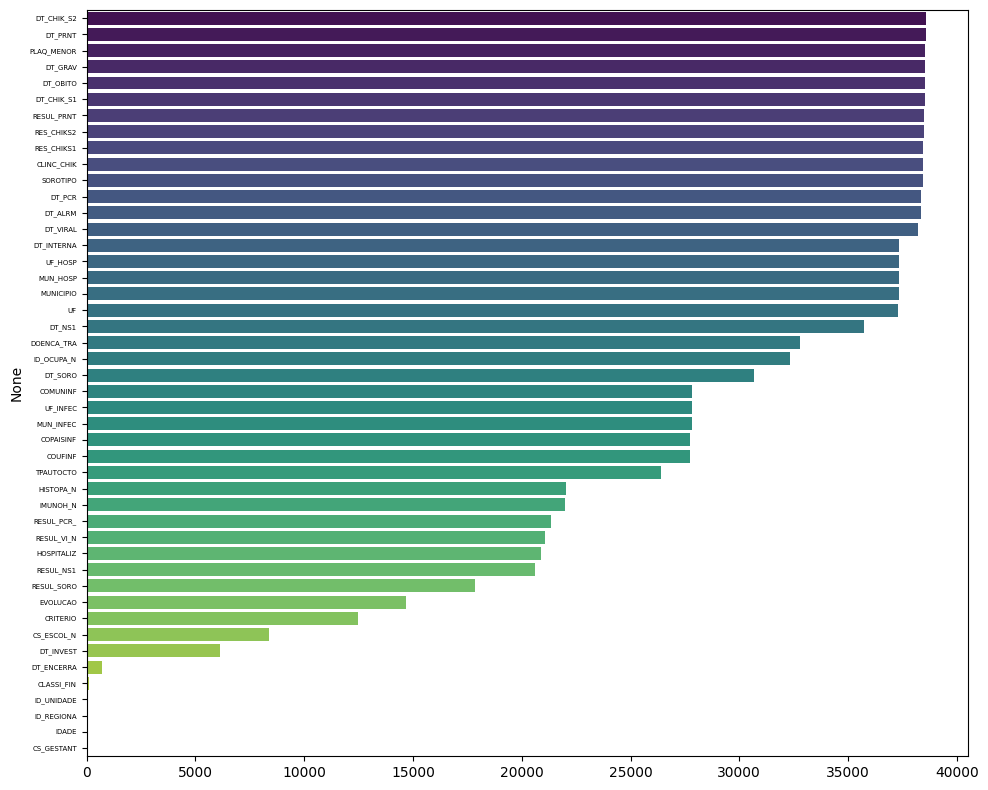

['DT_CHIK_S2', 'DT_PRNT', 'PLAQ_MENOR', 'DT_GRAV', 'DT_OBITO', 'DT_CHIK_S1', 'RESUL_PRNT', 'RES_CHIKS2', 'RES_CHIKS1', 'CLINC_CHIK', 'SOROTIPO', 'DT_PCR', 'DT_ALRM', 'DT_VIRAL', 'DT_INTERNA', 'UF_HOSP', 'MUN_HOSP', 'MUNICIPIO', 'UF', 'DT_NS1', 'DOENCA_TRA', 'ID_OCUPA_N', 'DT_SORO', 'COMUNINF', 'UF_INFEC', 'MUN_INFEC', 'COPAISINF', 'COUFINF', 'TPAUTOCTO', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_PCR_', 'RESUL_VI_N', 'HOSPITALIZ', 'RESUL_NS1', 'RESUL_SORO', 'EVOLUCAO', 'CRITERIO', 'CS_ESCOL_N', 'DT_INVEST', 'DT_ENCERRA', 'CLASSI_FIN', 'ID_UNIDADE', 'ID_REGIONA', 'IDADE', 'CS_GESTANT']


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o nome do seu DataFrame
X_df = df.isna().sum().sort_values(ascending=False)
drop_list_df = []
for i in range(len(X_df)):
    if X_df[i] == 0:
        drop_list_df.append(X_df.index[i])

X_df.drop(labels=drop_list_df, inplace=True)

plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura

# Definindo a cor das barras com base na contagem de valores NaN
palette = sns.color_palette("viridis", len(X_df))

# Criando o gráfico de barras com as barras coloridas e rótulos rotacionados
ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)

# Ajustando o tamanho da fonte e a rotação dos rótulos do eixo y
plt.yticks(fontsize=5, rotation=0)

plt.tight_layout()  # Melhorar o espaçamento
plt.show()

# Obtendo a lista de rótulos em ordem de aparecimento
rotulos = [label.get_text() for label in ax.get_yticklabels()]
print(rotulos)


In [ ]:
# Lista dos rótulos em ordem de aparecimento no gráfico
rotulos = [ 'CON_FHD', 'EVIDENCIA', 'EPISTAXE', 'METRO', 'PETEQUIAS', 'HEMATURA', 'SANGRAM', 'LACO_N', 'GENGIVO', 'COMPLICA', 'GRAV_PULSO', 'GRAV_HEMAT', 'GRAV_CONSC', 'GRAV_HIPOT', 'GRAV_MELEN', 'GRAV_ENCH', 'GRAV_EXTRE', 'GRAV_TAQUI', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONV', 'GRAV_ORGAO', 'GRAV_INSUF', 'GRAV_SANG', 'GRAV_METRO', 'PLASMATICO', 'MANI_HEMOR', 'NDUPLIC_N', 'RESUL_PRNT', 'RES_CHIKS2', 'RES_CHIKS1', 'CLINC_CHIK', 'SOROTIPO', 'ALRM_HIPOT', 'ALRM_ABDOM', 'ALRM_PLAQ', 'ALRM_LETAR', 'ALRM_HEMAT', 'ALRM_VOM', 'ALRM_LIQ', 'ALRM_SANG', 'ALRM_HEPAT', 'FLXRECEBI', 'DOENCA_TRA', 'TPAUTOCTO', 'LEUCOPENIA', 'PETEQUIA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'RENAL', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_PCR_', 'RESUL_VI_N', 'RESUL_NS1', 'TP_SISTEMA', 'RESUL_SORO', 'EVOLUCAO', 'CRITERIO', 'CS_ESCOL_N', 'CLASSI_FIN', 'CS_GESTANT']

# Reorganizando o DataFrame 'df' de acordo com a ordem dos rótulos
df_nan = df.reindex(columns=rotulos)

# Verificando o novo DataFrame
print(df_nan.head())


        CON_FHD     EVIDENCIA      EPISTAXE         METRO     PETEQUIAS  \
0  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro   
1  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro   
2  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro   
3  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro   
4  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro   

       HEMATURA       SANGRAM        LACO_N       GENGIVO      COMPLICA  ...  \
0  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro  ...   
1  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro  ...   
2  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro  ...   
3  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro  ...   
4  Sem Registro  Sem Registro  Sem Registro  Sem Registro  Sem Registro  ...   

     RESUL_PCR_     RESUL_VI_N      RESUL_NS1    TP_SISTEMA    RESUL

In [ ]:
# Contando os valores únicos em cada coluna
for coluna in df_nan.columns:
    valores_unicos = df_nan[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'CON_FHD':
Sem Registro    38568
Não                 1
Name: CON_FHD, dtype: int64

Valores únicos da coluna 'EVIDENCIA':
Sem Registro     38561
Não                  3
Sim                  3
Indeterminado        2
Name: EVIDENCIA, dtype: int64

Valores únicos da coluna 'EPISTAXE':
Sem Registro    38561
Sim                 4
Não                 4
Name: EPISTAXE, dtype: int64

Valores únicos da coluna 'METRO':
Sem Registro    38561
Não                 7
Sim                 1
Name: METRO, dtype: int64

Valores únicos da coluna 'PETEQUIAS':
Sem Registro    38561
Não                 5
Sim                 2
9.0                 1
Name: PETEQUIAS, dtype: int64

Valores únicos da coluna 'HEMATURA':
Sem Registro    38561
Não                 7
Sim                 1
Name: HEMATURA, dtype: int64

Valores únicos da coluna 'SANGRAM':
Sem Registro    38561
Sim                 5
Não                 3
Name: SANGRAM, dtype: int64

Valores únicos da coluna 'LACO_N':
Sem Registro  

In [ ]:
import plotly.express as px

# Filtrar o DataFrame para remover 'Sem Registro' e 'ignorado'
df_filtrado = df_nan[(df_nan['EVOLUCAO'] != 'Sem Registro') & (df_nan['EVOLUCAO'] != 'ignorado')]

# Contar os valores únicos após a remoção de 'Sem Registro' e 'ignorado'
contagem_valores = df_filtrado['EVOLUCAO'].value_counts()

# Criar o gráfico de barras interativo
fig = px.bar(contagem_valores, x=contagem_valores.index, y=contagem_valores.values,
             labels={'x': 'Desfecho', 'y': 'Contagem'}, title='Evolução de Casos de Dengue')


# Exibir apenas o rótulo da evolução e seu valor ao passar o mouse sobre a barra
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Exibir o gráfico
fig.show()



In [ ]:
# Se df é o seu DataFrame
# Substitua os valores NaN por 'Sem Registro'
df.fillna('Sem Registro', inplace=True)

# Ordenar os rótulos de acordo com a ordem de aparecimento no gráfico
rotulos_ordenados = [rotulo for rotulo in rotulos if rotulo in df.columns]

# Adicionar os rótulos que não estão presentes no DataFrame (caso existam)
rotulos_ordenados.extend([rotulo for rotulo in df.columns if rotulo not in rotulos])


In [ ]:
# Lista dos rótulos
rotulos = ['CON_FHD', 'EVIDENCIA', 'EPISTAXE', 'METRO', 'PETEQUIAS', 'HEMATURA', 'SANGRAM', 'LACO_N', 'GENGIVO', 'COMPLICA', 'GRAV_PULSO', 'GRAV_HEMAT', 'GRAV_CONSC', 'GRAV_HIPOT', 'GRAV_MELEN', 'GRAV_ENCH', 'GRAV_EXTRE', 'GRAV_TAQUI', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONV', 'GRAV_ORGAO', 'GRAV_INSUF', 'GRAV_SANG', 'GRAV_METRO', 'PLASMATICO', 'MANI_HEMOR', 'NDUPLIC_N', 'RESUL_PRNT', 'RES_CHIKS2', 'RES_CHIKS1', 'CLINC_CHIK', 'SOROTIPO', 'ALRM_HIPOT', 'ALRM_ABDOM', 'ALRM_PLAQ', 'ALRM_LETAR', 'ALRM_HEMAT', 'ALRM_VOM', 'ALRM_LIQ', 'ALRM_SANG', 'ALRM_HEPAT', 'FLXRECEBI', 'DOENCA_TRA','COPAISINF','TPAUTOCTO', 'LEUCOPENIA', 'PETEQUIA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'RENAL', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_VI_N', 'HOSPITALIZ', 'RESUL_NS1', 'TP_SISTEMA', 'RESUL_SORO', 'EVOLUCAO', 'CRITERIO']

# Obter valores únicos para cada coluna
for coluna in rotulos:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()


Valores únicos da coluna 'CON_FHD':
['Sem Registro' 'Não']

Valores únicos da coluna 'EVIDENCIA':
['Sem Registro' 'Não' 'Sim' 'Indeterminado']

Valores únicos da coluna 'EPISTAXE':
['Sem Registro' 'Sim' 'Não']

Valores únicos da coluna 'METRO':
['Sem Registro' 'Sim' 'Não']

Valores únicos da coluna 'PETEQUIAS':
['Sem Registro' 9.0 'Não' 'Sim']

Valores únicos da coluna 'HEMATURA':
['Sem Registro' 'Não' 'Sim']

Valores únicos da coluna 'SANGRAM':
['Sem Registro' 'Não' 'Sim']

Valores únicos da coluna 'LACO_N':
['Sem Registro' 'Não' 'Sim' 'Não Realizado']

Valores únicos da coluna 'GENGIVO':
['Sem Registro' 'Não' 'Sim']

Valores únicos da coluna 'COMPLICA':
['Sem Registro' 6.0 4.0 8.0 5.0]

Valores únicos da coluna 'GRAV_PULSO':
['Sem Registro' 'Não']

Valores únicos da coluna 'GRAV_HEMAT':
['Sem Registro' 'Não' 'Sim']

Valores únicos da coluna 'GRAV_CONSC':
['Sem Registro' 'Não']

Valores únicos da coluna 'GRAV_HIPOT':
['Sem Registro' 'Não' 'Sim']

Valores únicos da coluna 'GRAV_MELEN':

In [ ]:
# Dicionário de mapeamento para os valores da coluna CS_ESCOL_N
mapeamento_escolaridade = {
    1: '1ª a 4ª série incompleta do EF',
    2: '4ª série completa do EF (antigo 1° grau)',
    3: '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
    4: 'Ensino fundamental completo (antigo ginásio ou 1° grau)',
    5: 'Ensino médio incompleto (antigo colegial ou 2° grau)',
    6: 'Ensino médio completo (antigo colegial ou 2° grau)',
    7: 'Educação superior incompleta',
    8: 'Educação superior completa',
    9: 'Ignorado',
    10: 'Não se aplica'
}

# Substituir os valores na coluna CS_ESCOL_N usando o dicionário de mapeamento
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace(mapeamento_escolaridade)


In [ ]:
# Dicionário de mapeamento para os valores da coluna CS_GESTANT
mapeamento_gestante = {
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade gestacional ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
}

# Substituir os valores na coluna CS_GESTANT usando o dicionário de mapeamento
df['CS_GESTANT'] = df['CS_GESTANT'].replace(mapeamento_gestante)


In [ ]:
df['CS_ESCOL_N'].unique()

array(['Ensino médio completo (antigo colegial ou 2° grau)',
       'Sem Registro', 'Ignorado', 'Educação superior incompleta',
       '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
       'Educação superior completa', 'Não se aplica',
       'Ensino médio incompleto (antigo colegial ou 2° grau)',
       'Ensino fundamental completo (antigo ginásio ou 1° grau)',
       '4ª série completa do EF (antigo 1° grau)',
       '1ª a 4ª série incompleta do EF', 0.0], dtype=object)

In [ ]:
df['CS_GESTANT'].unique()

array(['Não se aplica', 'Não', 'Ignorado', '3º Trimestre',
       'Idade gestacional ignorada', '1º Trimestre', '2º Trimestre',
       'Sem Registro'], dtype=object)

In [ ]:
# Adicionando as variáveis fornecidas ao dicionário de renomeação e ao dicionário de tipos de dados

# Dicionário de renomeação das colunas
renomeacao_colunas = {
    'SEM_NOT': 'Semana de notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'Sigla do estado da notificação',
    'ID_REGIONA': 'ID da regional',
    'ID_UNIDADE': 'ID da unidade',
    'DT_SIN_PRI': 'Data do sinal/sintoma principal',
    'SEM_PRI': 'Semana do sinal/sintoma principal',
    'DT_NASC': 'Data de nascimento',
    'NU_IDADE_N': 'Número da ID na notificação',
    'CS_SEXO': 'Código do sexo',
    'CS_GESTANT': 'Código de gestante',
    'CS_RACA': 'Código da raça/cor',
    'CS_ESCOL_N': 'Código de escolaridade',
    'SG_UF': 'Sigla do estado',
    'ID_RG_RESI': 'ID da região de residência',
    'ID_PAIS': 'ID do país',
    'DT_INVEST': 'Data do início da investigação',
    'ID_OCUP': 'ID da ocupação',
    'FEBRE': 'Presença de febre',
    'MIALGIA': 'Presença de mialgia',
    'CEFALEIA': 'Presença de cefaleia',
    'EXANTEMA': 'Presença de exantema',
    'VOMITO': 'Presença de vômito',
    'NAUSEA': 'Presença de náusea',
    'DOR_COSTAS': 'Presença de dor nas costas',
    'CONJUNTVIT': 'Presença de conjuntivite',
    'ARTRITE': 'Presença de artrite',
    'ARTRALGIA': 'Presença de artralgia',
    'PETEQUIA_N': 'Presença de petéquias',
    'LEUCOPENIA': 'Presença de leucopenia',
    'LACO': 'Presença de laço',
    'DOR_RETRO': 'Presença de dor retroocular',
    'DIABETES': 'Presença de diabetes',
    'HEMATOLOG': 'Presença de hematológico',
    'HEPATOPAT': 'Presença de hepatopatia',
    'RENAL': 'Presença de renal',
    'HIPERTENSA': 'Presença de hipertensão',
    'ACIDO_PEPT': 'Presença de ácido péptico',
    'AUTO_IMUNE': 'Presença de autoimunidade',
    'DT_CHIK_S1': 'Data de coleta da amostra para o exame CHIKV IgM',
    'DT_CHIK_S2': 'Data de coleta da amostra para o exame CHIKV IgG',
    'DT_PRNT': 'Data de coleta da amostra para o exame PRNT',
    'RES_CHIKS1': 'Resultado do exame CHIKV IgM',
    'RES_CHIKS2': 'Resultado do exame CHIKV IgG',
    'RESUL_PRNT': 'Resultado do exame PRNT',
    'DT_SORO': 'Data da coleta de soro',
    'RESUL_SORO': 'Resultado do exame sorológico',
    'DT_NS1': 'Data da coleta de NS1',
    'RESUL_NS1': 'Resultado do exame NS1',
    'DT_VIRAL': 'Data da coleta do exame de PCR',
    'RESUL_VI_N': 'Resultado do exame de PCR',
    'DT_PCR': 'Data da coleta do exame de PCR',
    'RESUL_PCR_': 'Resultado do exame de PCR',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado do exame histopatológico',
    'IMUNOH_N': 'Resultado do exame imunohistoquímico',
    'HOSPITALIZ': 'Indicador de hospitalização',
    'DT_INTERNA': 'Data de internação',
    'UF_INFEC': 'Estado do Brasil',
    'TPAUTOCTO': 'Tipo de notificação autóctone',
    'COUFINF': 'Código de confirmação de infecção',
    'COPAISINF': 'Código de país confirmado de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação',
    'DOENCA_TRA': 'Doença relacionada ao trabalho',
    'CLINC_CHIK': 'Clínica de Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data de óbito',
    'DT_ENCERRA': 'Data de encerramento',
    'ALRM_HIPOT': 'Alarme de hipotensão',
    'ALRM_PLAQ': 'Alarme de plaquetas',
    'ALRM_VOM': 'Alarme de vômito',
    'ALRM_SANG': 'Alarme de sangramento',
    'ALRM_HEMAT': 'Alarme de hematoma',
    'GRAV_MIOC': 'Gravidade de miocárdio',
    'GRAV_CONSC': 'Gravidade de nível de consciência',
    'GRAV_ORGAO': 'Gravidade de órgão',
    'DT_GRAV': 'Data da Gravidade',
    'MANI_HEMOR': 'Manifestação de hemorragia',
    'EPISTAXE': 'Manifestação de epistaxe',
    'GENGIVO': 'Manifestação na gengiva',
    'METRO': 'Manifestação de metrorragia',
    'PETEQUIAS': 'Manifestação de petéquias',
    'HEMATURA': 'Manifestação de hematúria',
    'SANGRAM': 'Manifestação de sangramento',
    'LACO_N': 'Presença de laço',
    'PLASMATICO': 'Relacionado ao plasma',
    'EVIDENCIA': 'Evidência médica',
    'PLAQ_MENOR': 'Menor contagem de plaquetas',
    'CON_FHD': 'Hipertensão Familiar',
    'COMPLICA': 'Presença de complicações',
    'TP_SISTEMA': 'Tipo de sistema',
    'NDUPLIC_N': 'Reincidência do quadro',
    'CS_FLXRET': 'Fluxo de retorno',
    'FLXRECEBI': 'Fluxo de retorno recebido',
    'NOME DO MUNICÍPIO': 'Nome do município',
    'POPULAÇÃO ESTIMADA 2020': 'População estimada em 2020',
    'POPULAÇÃO ESTIMADA 2019': 'População estimada em 2019',
    'POPULAÇÃO ESTIMADA 2018': 'População estimada em 2018',
    'POPULAÇÃO ESTIMADA 2017': 'População estimada em 2017',
    'POPULAÇÃO ESTIMADA 2016': 'População estimada em 2016',
    'POPULAÇÃO ESTIMADA 2015': 'População estimada em 2015',
    'POPULAÇÃO ESTIMADA 2014': 'População estimada em 2014',
    'POPULAÇÃO ESTIMADA 2013': 'População estimada em 2013',
    'POPULAÇÃO ESTIMADA 2012': 'População estimada em 2012',
    'POPULAÇÃO ESTIMADA 2011': 'População estimada em 2011',
    'MUN_HOSP': 'Município do hospital',
    'UF_HOSP': 'UF do hospital',
    'MUN_SAUDENOT': 'Município do evento de saúde notificado',
    'UF_SAUDENOT': 'UF do evento de saúde notificado',
    'MUN_RESI': 'Município de residência',
    'UF_RESI': 'UF de residência',
    'MUN_INFEC': 'Município de infecção',
    'UF_INFEC': 'UF de infecção',
    'IDADE' : 'Idade',
    'SEM_PRI' : 'Semana epidemiológica do primeiro sintoma'
}


# Aplicando a renomeação das colunas
df2 = df.rename(columns=renomeacao_colunas)

# Verificando as colunas renomeadas
print(df2.columns)

Index(['NU_NOTIFIC', 'ID_PESSOA', 'NOME', 'COMUNINF', 'ID_MN_RESI',
       'ID_MUNICIP', 'MUNICIPIO', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC',
       ...
       'Município do hospital', 'UF do hospital',
       'Município do evento de saúde notificado',
       'UF do evento de saúde notificado', 'MUNI_RESI', 'UF de residência',
       'Município de infecção', 'UF de infecção', 'Idade', 'SEM_PRI_V'],
      dtype='object', length=143)


In [ ]:
# Dicionário de renomeação das colunas
renomeacao = {
    'NU_NOTIFIC': 'Número da notificação',
    'ID_PESSOA': 'ID da pessoa',
    'NOME': 'Nome',
    'COMUNINF': 'Comunicação da infecção',
    'ID_MN_RESI': 'ID do município de residência',
    'ID_MUNICIP': 'ID do município',
    'MUNICIPIO': 'Município',
    'TP_NOT': 'Tipo de notificação',
    'ID_AGRAVO': 'ID do agravo',
    'DT_NOTIFIC': 'Data de notificação',
    'ALRM_ABDOM': 'Alarme de dor abdominal',
    'ALRM_LETAR': 'Alarme de letargia',
    'ALRM_HEPAT': 'Alarme de hepatomegalia',
    'ALRM_LIQ': 'Alarme de derrame pleural',
    'DT_ALRM': 'Data do alarme',
    'GRAV_PULSO': 'Gravidade de pulso',
    'GRAV_CONV': 'Gravidade de convulsão',
    'GRAV_ENCH': 'Gravidade de enchimento',
    'GRAV_INSUF': 'Gravidade de insuficiência',
    'GRAV_TAQUI': 'Gravidade de taquicardia',
    'GRAV_EXTRE': 'Gravidade de extremidades frias',
    'GRAV_HIPOT': 'Gravidade de hipotensão',
    'GRAV_HEMAT': 'Gravidade de hematoma',
    'GRAV_MELEN': 'Gravidade de melena',
    'GRAV_METRO': 'Gravidade de metrorragia',
    'GRAV_SANG': 'Gravidade de sangramento',
    'GRAV_AST': 'Gravidade de astenia',
    'SEM_PRI_V': 'Semana do primeiro sintoma'
}

# Renomeando as colunas
df2.rename(columns=renomeacao, inplace=True)

# Verificando o resultado
print(df2.columns)


Index(['Número da notificação', 'ID da pessoa', 'Nome',
       'Comunicação da infecção', 'ID do município de residência',
       'ID do município', 'Município', 'Tipo de notificação', 'ID do agravo',
       'Data de notificação',
       ...
       'Município do hospital', 'UF do hospital',
       'Município do evento de saúde notificado',
       'UF do evento de saúde notificado', 'MUNI_RESI', 'UF de residência',
       'Município de infecção', 'UF de infecção', 'Idade',
       'Semana do primeiro sintoma'],
      dtype='object', length=143)


In [ ]:
for column in df2.columns:
    print(column)


Número da notificação
ID da pessoa
Nome
Comunicação da infecção
ID do município de residência
ID do município
Município
Tipo de notificação
ID do agravo
Data de notificação
Semana de notificação
Ano da notificação
Sigla do estado da notificação
ID da regional
ID da unidade
Data do sinal/sintoma principal
Semana epidemiológica do primeiro sintoma
Data de nascimento
Número da ID na notificação
Código do sexo
Código de gestante
Código da raça/cor
Código de escolaridade
Sigla do estado
ID da região de residência
ID do país
Data do início da investigação
ID_OCUPA_N
Presença de febre
Presença de mialgia
Presença de cefaleia
Presença de exantema
Presença de vômito
Presença de náusea
Presença de dor nas costas
Presença de conjuntivite
Presença de artrite
Presença de artralgia
Presença de petéquias
Presença de leucopenia
Presença de laço
Presença de dor retroocular
Presença de diabetes
Presença de hematológico
Presença de hepatopatia
Presença de renal
Presença de hipertensão
Presença de ácido p

In [ ]:
# Lista para armazenar os nomes das colunas que contêm "Sem Registro"
colunas_com_sem_registro = []

# Iterar sobre as colunas do DataFrame
for coluna in df.columns:
    # Verificar se algum valor na coluna é igual a "Sem Registro"
    if (df[coluna] == 'Sem Registro').any():
        colunas_com_sem_registro.append(coluna)

# Exibir as colunas que contêm "Sem Registro"
print("Colunas que contêm 'Sem Registro':")
print(colunas_com_sem_registro)


Colunas que contêm 'Sem Registro':
['COMUNINF', 'MUNICIPIO', 'ID_REGIONA', 'ID_UNIDADE', 'CS_GESTANT', 'CS_ESCOL_N', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1', 'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'TPAUTOCTO', 'COUFINF', 'COPAISINF', 'CLASSI_FIN', 'CRITERIO', 'DOENCA_TRA', 'CLINC_CHIK', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'DT_ALRM', 'GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPO

<ipython-input-49-bb942e513ea0>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




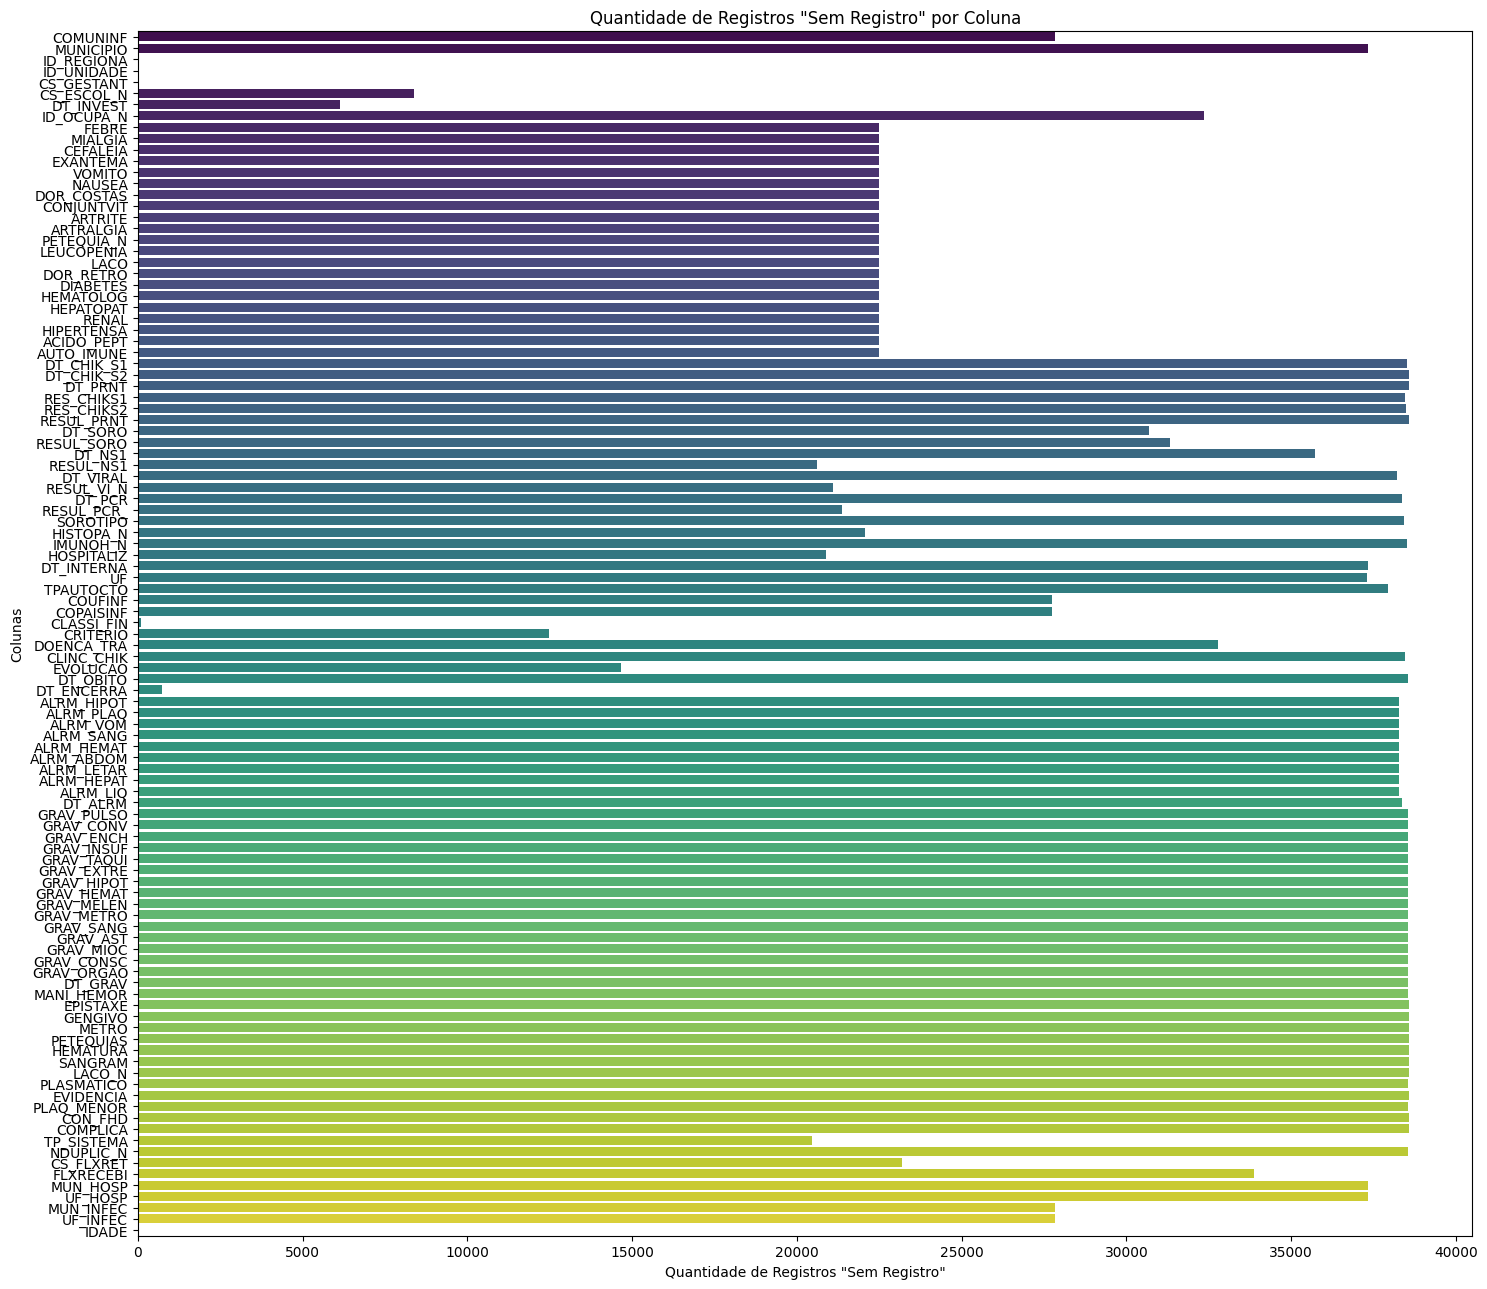

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lista para armazenar os nomes das colunas que contêm "Sem Registro"
colunas_com_sem_registro = []

# Iterar sobre as colunas do DataFrame
for coluna in df.columns:
    # Verificar se algum valor na coluna é igual a "Sem Registro"
    if (df[coluna] == 'Sem Registro').any():
        colunas_com_sem_registro.append(coluna)

# Criar um DataFrame apenas com as colunas que têm "Sem Registro"
df_sem_registro = df[colunas_com_sem_registro]

# Calcular a contagem de valores "Sem Registro" em cada coluna
contagem_sem_registro = df_sem_registro.apply(lambda col: col.value_counts().get('Sem Registro', 0))

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(15, 13))  # Definindo o tamanho da figura
ax = sns.barplot(y=contagem_sem_registro.index, x=contagem_sem_registro.values, orient='h', palette="viridis")

# Ajustar os rótulos e o espaçamento
plt.xlabel('Quantidade de Registros "Sem Registro"')
plt.ylabel('Colunas')
plt.title('Quantidade de Registros "Sem Registro" por Coluna')
plt.tight_layout()
plt.show()
